In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.cluster import KMeans
import plotly.express as px

In [60]:
# Memuat dataset dari file CSV
data = pd.read_csv('healthcare-dataset-stroke-data.csv')

In [61]:
# Handling Missing Values
mean_bmi = data['bmi'].mean()
data['bmi'].fillna(mean_bmi, inplace=True)

In [62]:
# Encoding data kategorikal
data = pd.get_dummies(data, columns=['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status'], drop_first=True)

In [63]:
# Split data menjadi data pelatihan dan data pengujian
X = data.drop('stroke', axis=1)
y = data['stroke']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [64]:
# Klasifikasi dengan Decision Tree
decision_tree_model = DecisionTreeClassifier()
decision_tree_model.fit(X_train, y_train)
y_pred_decision_tree = decision_tree_model.predict(X_test)

In [65]:
# Klasifikasi dengan Random Forest
random_forest_model = RandomForestClassifier()
random_forest_model.fit(X_train, y_train)
y_pred_random_forest = random_forest_model.predict(X_test)

In [66]:
# Klasifikasi dengan SVM
svm_model = SVC()
svm_model.fit(X_train, y_train)
y_pred_svm = svm_model.predict(X_test)

In [67]:
# Pemodelan Regresi dengan Logistic Regression
regression_model = LogisticRegression()
regression_model.fit(X_train, y_train)
y_pred_regression = regression_model.predict(X_test)

In [68]:
# Evaluasi performa model
accuracy_regression = accuracy_score(y_test, y_pred_regression)
classification_report_regression = classification_report(y_test, y_pred_regression)
confusion_mat_regression = confusion_matrix(y_test, y_pred_regression)

accuracy_decision_tree = accuracy_score(y_test, y_pred_decision_tree)
classification_report_decision_tree = classification_report(y_test, y_pred_decision_tree)
confusion_mat_decision_tree = confusion_matrix(y_test, y_pred_decision_tree)

accuracy_random_forest = accuracy_score(y_test, y_pred_random_forest)
classification_report_random_forest = classification_report(y_test, y_pred_random_forest)
confusion_mat_random_forest = confusion_matrix(y_test, y_pred_random_forest)

accuracy_svm = accuracy_score(y_test, y_pred_svm)
classification_report_svm = classification_report(y_test, y_pred_svm)
confusion_mat_svm = confusion_matrix(y_test, y_pred_svm)

C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `

In [69]:
print('Logistic Regression:')
print(f'Accuracy: {accuracy_regression}')
print('Classification Report:\n', classification_report_regression)
print('Confusion Matrix:\n', confusion_mat_regression)

print('\nDecision Tree:')
print(f'Accuracy: {accuracy_decision_tree}')
print('Classification Report:\n', classification_report_decision_tree)
print('Confusion Matrix:\n', confusion_mat_decision_tree)

print('\nRandom Forest:')
print(f'Accuracy: {accuracy_random_forest}')
print('Classification Report:\n', classification_report_random_forest)
print('Confusion Matrix:\n', confusion_mat_random_forest)

print('\nSVM:')
print(f'Accuracy: {accuracy_svm}')
print('Classification Report:\n', classification_report_svm)
print('Confusion Matrix:\n', confusion_mat_svm)

Logistic Regression:
Accuracy: 0.9363992172211351
Classification Report:
               precision    recall  f1-score   support

           0       0.94      1.00      0.97       960
           1       0.00      0.00      0.00        62

    accuracy                           0.94      1022
   macro avg       0.47      0.50      0.48      1022
weighted avg       0.88      0.94      0.91      1022

Confusion Matrix:
 [[957   3]
 [ 62   0]]

Decision Tree:
Accuracy: 0.9080234833659491
Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.96      0.95       960
           1       0.15      0.11      0.13        62

    accuracy                           0.91      1022
   macro avg       0.55      0.54      0.54      1022
weighted avg       0.90      0.91      0.90      1022

Confusion Matrix:
 [[921  39]
 [ 55   7]]

Random Forest:
Accuracy: 0.9393346379647749
Classification Report:
               precision    recall  f1-score   supp

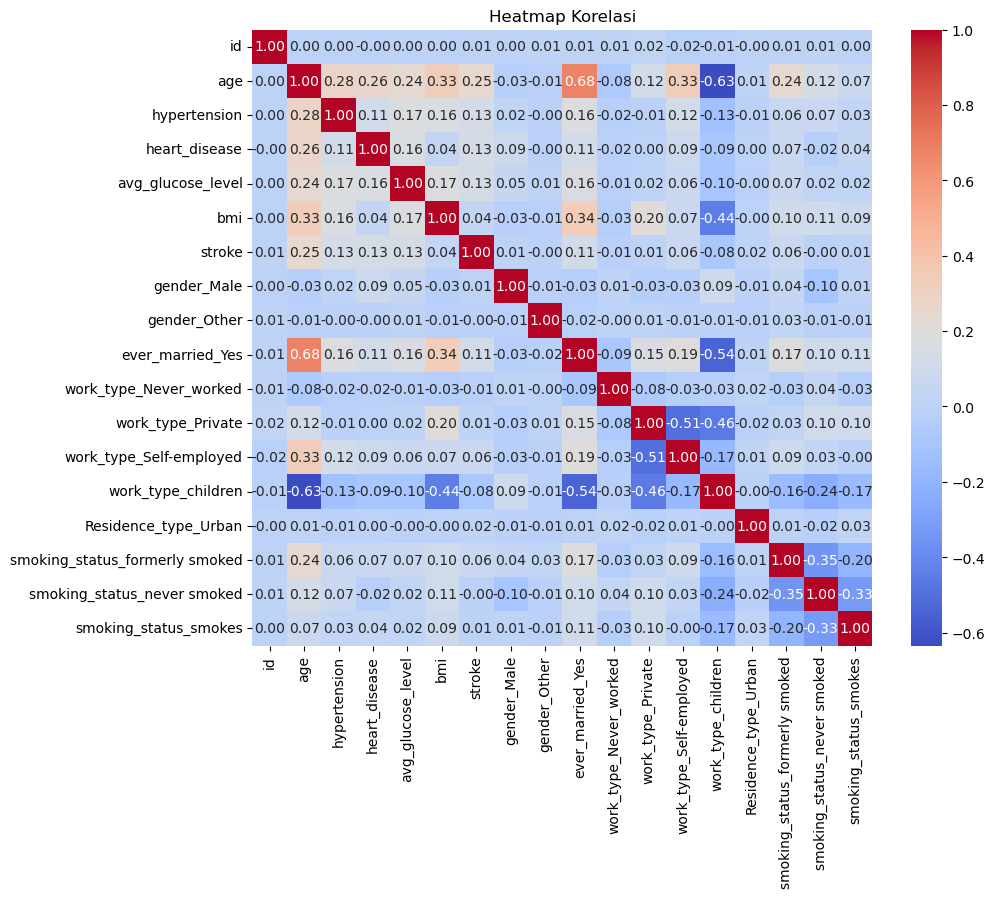

In [70]:
# Analisis Korelasi dengan Heatmap
correlation_matrix = data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Heatmap Korelasi")
plt.show()

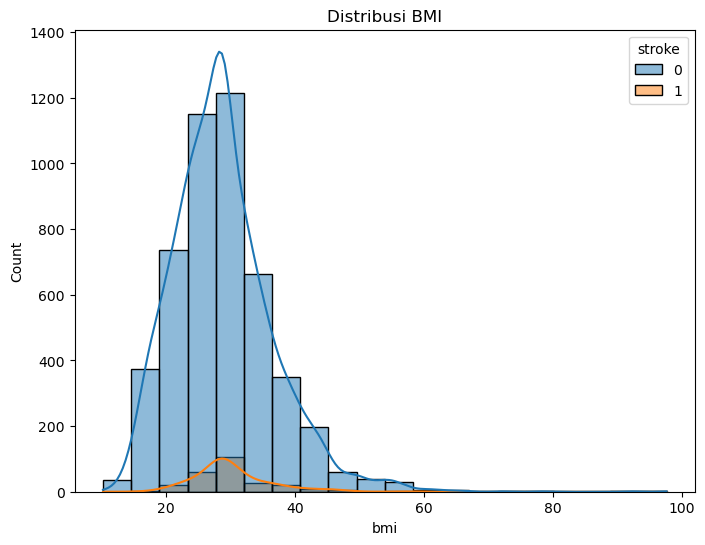

In [71]:
# Analisis Distribusi BMI pada Pasien yang Mengalami Stroke dan Tidak Mengalami Stroke
plt.figure(figsize=(8, 6))
sns.histplot(data=data, x='bmi', hue='stroke', bins=20, kde=True)
plt.title('Distribusi BMI')
plt.show()

In [72]:
# Analisis Korelasi BMI dengan Variabel Lainnya
correlation_with_bmi = data.corr()['bmi'].sort_values(ascending=False)
print('Korelasi BMI dengan Variabel Lainnya:')
print(correlation_with_bmi)


Korelasi BMI dengan Variabel Lainnya:
bmi                               1.000000
ever_married_Yes                  0.335705
age                               0.325942
work_type_Private                 0.203884
avg_glucose_level                 0.168751
hypertension                      0.160189
smoking_status_never smoked       0.106220
smoking_status_formerly smoked    0.104257
smoking_status_smokes             0.085579
work_type_Self-employed           0.070822
stroke                            0.038947
heart_disease                     0.038899
id                                0.002999
Residence_type_Urban             -0.000120
gender_Other                     -0.011802
gender_Male                      -0.025464
work_type_Never_worked           -0.028600
work_type_children               -0.442843
Name: bmi, dtype: float64


In [73]:
# Analisis Jumlah Pasien Stroke berdasarkan BMI
stroke_patients_high_bmi = data[(data['stroke'] == 1) & (data['bmi'] >= 30)]
total_stroke_patients_high_bmi = len(stroke_patients_high_bmi)

stroke_patients_normal_bmi = data[(data['stroke'] == 1) & (data['bmi'] >= 18.5) & (data['bmi'] < 30)]
total_stroke_patients_normal_bmi = len(stroke_patients_normal_bmi)

print('Jumlah pasien yang terkena stroke dengan BMI tinggi (>= 30):', total_stroke_patients_high_bmi)
print('Jumlah pasien yang terkena stroke dengan BMI normal (>= 18.5 dan < 30):', total_stroke_patients_normal_bmi)


Jumlah pasien yang terkena stroke dengan BMI tinggi (>= 30): 98
Jumlah pasien yang terkena stroke dengan BMI normal (>= 18.5 dan < 30): 150


In [74]:
# Pengelompokan (Clustering)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
kmeans_model = KMeans(n_clusters=3)
kmeans_model.fit(X_scaled)
clusters = kmeans_model.predict(X_scaled)
data['Cluster'] = clusters

C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



In [75]:
# Visualisasi Interaktif dengan Plotly
fig = px.scatter(data, x='bmi', y='stroke', color='Cluster', hover_data=['age', 'avg_glucose_level'],
                 title='Hubungan BMI dan Stroke dengan Pengelompokan')
fig.show()